In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from PIL import ImageFont, ImageDraw, Image

In [2]:
def createImage(name, fontpath, fontSize):
    blank = np.zeros((100, 500, 3), dtype='uint8')
    blank[:] = 255,255,255
    
    font = ImageFont.truetype(fontpath, fontSize)
    img_pil = Image.fromarray(blank)
    draw = ImageDraw.Draw(img_pil)
    w, h = draw.textsize(name, font = font)
    draw.text(((500-w)/2,(140-h)/2), name, font = font, fill = (0, 0, 0))
    return np.array(img_pil)

In [3]:
blank = np.zeros((100, 500, 3), dtype='uint8')
blank[:] = 255,255,255

In [4]:
fontpath = "./fonts/4u-Malith.ttf"     
font = ImageFont.truetype(fontpath, 60)
img_pil = Image.fromarray(blank)
draw = ImageDraw.Draw(img_pil)
w, h = draw.textsize('wxlvf.a', font = font)
draw.text(((500-w)/2,(100-h)/2), "wxlvf.a", font = font, fill = (0, 0, 0))
image = np.array(img_pil)

In [5]:
import random

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [6]:
noisyText = sp_noise(image, 0.05)

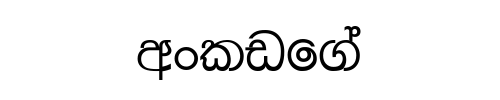

In [7]:
display(Image.fromarray(image))

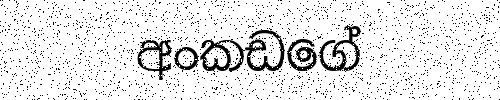

In [8]:
display(Image.fromarray(noisyText))

In [9]:
def gaussianBlur(image, kernalSize, x, y, s):
    blurred_img = cv.GaussianBlur(image, kernalSize, 0)
    mask = np.zeros(image.shape, dtype=np.uint8)
    mask = cv.rectangle(mask, (x, y), (x + 30, y + 30), (255, 255,255), -1)
    out = np.where(mask!=np.array([255, 255, 255]), image, blurred_img)
    return out


In [10]:
image.shape

(100, 500, 3)

In [11]:
blurred_img = cv.GaussianBlur(image, (11, 11), 0)

mask = np.zeros((100, 500, 3), dtype=np.uint8)
# mask = cv.circle(mask, (100, 100), 100, (255, 255,255), -1)
mask = cv.rectangle(mask, (250, 50), (280, 80), (255, 255,255), -1)

out = np.where(mask!=np.array([255, 255, 255]), image, blurred_img)

In [12]:
s = 30
x,  y = random.randint((image.shape[1] - w)//2, (image.shape[1] + w)//2 - s), random.randint((image.shape[0] - h)//2, (image.shape[0] + h)//2 - s)
out = gaussianBlur(image, (11, 11), x, y, s)

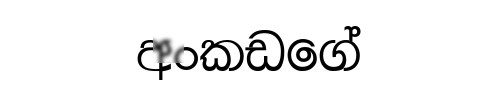

In [13]:
display(Image.fromarray(out))

In [14]:
from os import path

path.abspath('')

'c:\\Users\\Yasith\\Documents\\GitHub\\FYP-Omega\\Data\\Error_Data\\ocr_error_data'

In [15]:
uni = open('c:\\Users\\Yasith\\Documents\\GitHub\\FYP-Omega\\Data/combined all names - cleaned - test.txt', 'r', encoding='utf-8').readlines()
len(uni)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Yasith\\Documents\\GitHub\\FYP-Omega\\Data/combined all names - cleaned - test.txt'

In [17]:
#file_path = (base_path / "../Data/legacy - train.txt").resolve()
import pytesseract
import regex as re
import pandas as pd

x=1 

fonts = ['fonts/4u-Malith.ttf','fonts/FM_Abhaya.ttf']
col = ['Malith','Abhaya']
for n in range(x,2):
    uni = open('c:\\Users\\Yasith\\Documents\\GitHub\\FYP-Omega\\Data/Addresses/addresses - cleaned.txt', 'r', encoding='utf-8').readlines()[(n-1)*10000:n*10000]
    #uni = open('c:\\Users\\Yasith\\Documents\\GitHub\\FYP-Omega\\Data/addresses - cleaned.txt', 'r', encoding='utf-8').readlines()[100000:]
    error = pd.DataFrame()
    error['original']=uni
    error['original'] = error['original'].str.replace(r'\n', '')

    names = open('c:\\Users\\Yasith\\Documents\\GitHub\\FYP-Omega\\Data/Addresses/legacy - addresses.txt', 'r', encoding='utf-8').readlines()[(n-1)*10000:n*10000]
    #names = open('c:\\Users\\Yasith\\Documents\\GitHub\\FYP-Omega\\Data/legacy - test.txt', 'r', encoding='utf-8').readlines()[100000:]
    num=0
    for i in range(2):
        ocr=[]
        for line in names:
            #print(line)
            #unicodeName, legacyName = line.strip().split('\t')
            image = createImage(line, fonts[i], 60)
            noisyImage = sp_noise(image, 0.05)
            s = 30
            x,  y = random.randint((image.shape[1] - w)//2, (image.shape[1] + w)//2 - s), random.randint((image.shape[0] - h)//2, (image.shape[0] + h)//2 - s)
            bluredImage = gaussianBlur(noisyImage, (11, 11), x, y, s)
            #display(Image.fromarray(bluredImage))
            cv.imwrite(f'address/{num}.jpg', bluredImage)

            text = pytesseract.image_to_string(bluredImage, lang='sin',config='--psm 8')
            #print(text)
            text = re.sub(r'[^\w]|_|[a-zA-Z]|[0-9]|\u200c', '', text)
            text = text.strip()
            #print(uni[num],text)
            ocr.append(text)
            
            # unic=uni[num].strip()
            # if not (unic==text):
            #     count+=1
            #     print(uni[num].strip(),text)
            num+=1
            if num%5000==0:
                print (num)
        error[col[i]] = ocr
    error.head()
    error.to_csv(f'address OCR errors testing - {n}.csv',encoding='utf-8-sig',index=False)

<ipython-input-17-43a9fce51b9d>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  error['original'] = error['original'].str.replace(r'\n', '')


5000
10000
15000
20000
